<a href="https://colab.research.google.com/github/mahdi2460/CDB_Analysis_Program/blob/main/All_fit_for_CDBS_and_important.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-9122c77cfad0>:41: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fitting_function, x_data, y_data, p0=initial_params)


Fitted Parameters: [ 2.35966752e+03  1.00000000e+01 -2.35966732e+03  1.50000000e+01
  3.54906917e-01  2.20436393e+00  1.45874626e-01]
Chi-squared value: 0.4872245050970939
Reduced Chi-squared value: 0.00037249579900389444


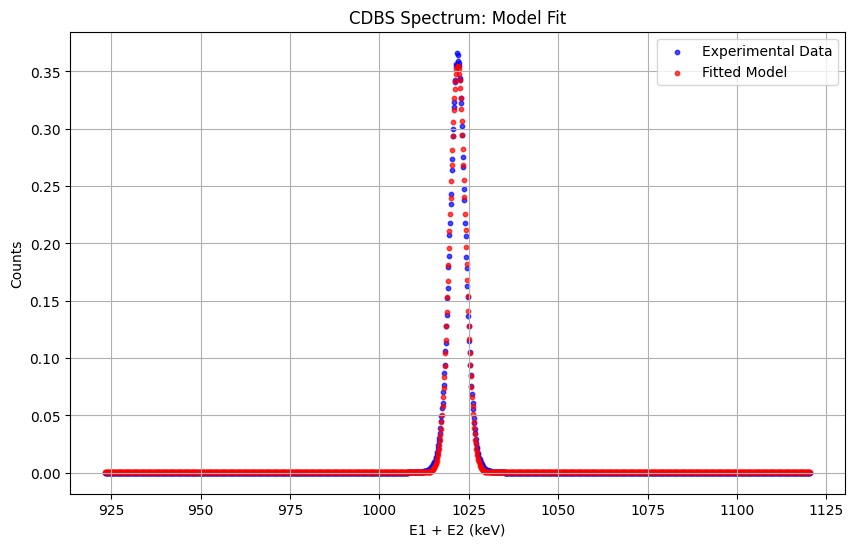

Results saved to 'CDBS_Fit_Results.xlsx'


In [6]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the conduction band function
def conduction_band(E1, E2, C, alpha):
    mask = np.abs(E1 - E2) <= alpha  # Cutoff condition
    return C * mask

# Define the core electron function
def core_electrons(E1, E2, A, sigma, B):
    return A * np.exp(-((E1 + E2 + B - 1022) ** 2) / (2 * sigma ** 2))

# Define the complete model
def model(E1, E2, C1, alpha1, C2, alpha2, A1, sigma1, B1):
    return (
        conduction_band(E1, E2, C1, alpha1) +
        conduction_band(E1, E2, C2, alpha2) +
        core_electrons(E1, E2, A1, sigma1, B1)
    )

# Load your data (ensure 'data.csv' has columns 'E1', 'E2', 'Counts')
data = pd.read_csv("data.csv")
E1 = data["E1"].values
E2 = data["E2"].values
counts = data["Counts"].values

# Flatten data for curve fitting
x_data = np.column_stack((E1, E2))
y_data = counts

# Define initial guesses for parameters [C1, alpha1, C2, alpha2, A1, sigma1, B1]
initial_params = [30, 10, 10, 15, 25, 5, -5]

# Define the fitting function for curve_fit
def fitting_function(x, *params):
    return model(x[:, 0], x[:, 1], *params)

# Perform the fit
popt, pcov = curve_fit(fitting_function, x_data, y_data, p0=initial_params)

# Extract fitted parameters
fitted_params = popt
print("Fitted Parameters:", fitted_params)

# Calculate the fitted model values
fitted_counts = fitting_function(x_data, *fitted_params)

# Calculate Chi-squared value
chi_squared = np.sum(((y_data - fitted_counts) ** 2) / fitted_counts)
reduced_chi_squared = chi_squared / (len(y_data) - len(fitted_params))
print("Chi-squared value:", chi_squared)
print("Reduced Chi-squared value:", reduced_chi_squared)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(E1 + E2, counts, label="Experimental Data", color="blue", alpha=0.7, s=10)
plt.scatter(E1 + E2, fitted_counts, label="Fitted Model", color="red", alpha=0.7, s=10)
plt.xlabel("E1 + E2 (keV)")
plt.ylabel("Counts")
plt.title("CDBS Spectrum: Model Fit")
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
output_data = pd.DataFrame({
    "E1": E1,
    "E2": E2,
    "Experimental Counts": counts,
    "Fitted Counts": fitted_counts
})

# Save fitted parameters and Chi-squared to a separate sheet
summary_data = pd.DataFrame({
    "Parameter": ["C1", "alpha1", "C2", "alpha2", "A1", "sigma1", "B1", "Chi-squared", "Reduced Chi-squared"],
    "Value": list(fitted_params) + [chi_squared, reduced_chi_squared]
})

# Write to an Excel file
with pd.ExcelWriter("CDBS_Fit_Results.xlsx") as writer:
    output_data.to_excel(writer, sheet_name="Fit Data", index=False)
    summary_data.to_excel(writer, sheet_name="Fit Summary", index=False)

print("Results saved to 'CDBS_Fit_Results.xlsx'")
